<a href="https://colab.research.google.com/github/mfakhru/rock-paper-scissors-classification/blob/main/rock-paper-scissors-classification-sequential-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification: Rock Paper Scissors**

Recognize the shape of the hands that makes up scissors, rock, or paper.

By:


> [**mfakhru**](https://github.com/mfakhru/rock-paper-scissors-classification)






## Preparation

In [1]:
# Calculate runtime every cells

!pip install ipython-autotime
%load_ext autotime

time: 2.21 ms (started: 2021-07-24 11:49:46 +00:00)


In [2]:
# Import the required libraries

import tensorflow as tf
import zipfile, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.preprocessing import image
from google.colab import files
%matplotlib inline

time: 1.69 s (started: 2021-07-24 11:49:51 +00:00)


In [3]:
# Make sure using Tensorflow 2.x

print('Versi TensorFlow:', tf.__version__)

Versi TensorFlow: 2.5.0
time: 1.08 ms (started: 2021-07-24 11:49:54 +00:00)


## Data Preprocessing

In [4]:
# Preparing the dataset from dicoding academy

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O rockpaperscissors.zip

--2021-07-24 11:49:56--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M   905KB/s    in 40s     

2021-07-24 11:50:37 (7.68 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]

time: 41.1 s (started: 2021-07-24 11:49:56 +00:00)


In [5]:
# Extract Zip File

local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

time: 4.08 s (started: 2021-07-24 11:50:37 +00:00)


In [6]:
# Create directory base_dir, train_dir, and val_dir

base_dir = 'rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

os.listdir(base_dir)

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

time: 11 ms (started: 2021-07-24 11:53:05 +00:00)


In [7]:
# Image Augmentation

train_aug = ImageDataGenerator(
      rescale= 1./255,
      rotation_range= 20,
      zoom_range=0.15,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip= True,
      shear_range= 0.2,
      fill_mode= 'nearest',
      validation_split= 0.4)

val_aug = ImageDataGenerator(
      rescale= 1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range= 0.2,
      fill_mode= 'nearest',
      validation_split= 0.4)

time: 4.76 ms (started: 2021-07-24 11:53:10 +00:00)


In [8]:
# Create ImageDataGenerator

train_data = train_aug.flow_from_directory(
        base_dir,
        target_size=(100,150),
        class_mode='categorical',
        batch_size=32,
        subset='training')

val_data = val_aug.flow_from_directory(
        base_dir,
        target_size=(100,150),
        class_mode='categorical',
        batch_size=32,
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
time: 213 ms (started: 2021-07-24 11:53:21 +00:00)


## Building Model

In [9]:
# Building a sequential model

model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(3, activation='softmax')
])

# compile model with 'RMSprop' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=None),
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 21760)             0

In [10]:
# Define callback function

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print('\nYour accuracy has reached 98%!')
      self.model.stop_training = True

callbacks = myCallback()

time: 4.33 ms (started: 2021-07-24 11:53:35 +00:00)


## Train Model

In [11]:
# Train model with model.fit

h = model.fit(
  train_data,
  batch_size=8,
  epochs=50,
  steps_per_epoch=16,
  validation_data=val_data,
  callbacks=[callbacks]
  )

Epoch 1/50
16/16 [==============================] - 39s 497ms/step - loss: 1.6300 - accuracy: 0.3926 - val_loss: 1.0615 - val_accuracy: 0.4886
Epoch 2/50
16/16 [==============================] - 8s 496ms/step - loss: 1.0713 - accuracy: 0.4316 - val_loss: 0.9803 - val_accuracy: 0.6362
Epoch 3/50
16/16 [==============================] - 8s 491ms/step - loss: 0.9889 - accuracy: 0.5156 - val_loss: 0.8778 - val_accuracy: 0.6144
Epoch 4/50
16/16 [==============================] - 7s 464ms/step - loss: 0.9036 - accuracy: 0.5957 - val_loss: 0.6815 - val_accuracy: 0.7117
Epoch 5/50
16/16 [==============================] - 7s 455ms/step - loss: 0.7671 - accuracy: 0.6888 - val_loss: 0.5209 - val_accuracy: 0.8215
Epoch 6/50
16/16 [==============================] - 7s 456ms/step - loss: 0.7010 - accuracy: 0.7116 - val_loss: 0.4948 - val_accuracy: 0.8227
Epoch 7/50
16/16 [==============================] - 7s 458ms/step - loss: 0.5829 - accuracy: 0.7480 - val_loss: 0.4426 - val_accuracy: 0.8638
Epoch

## Plot the Model

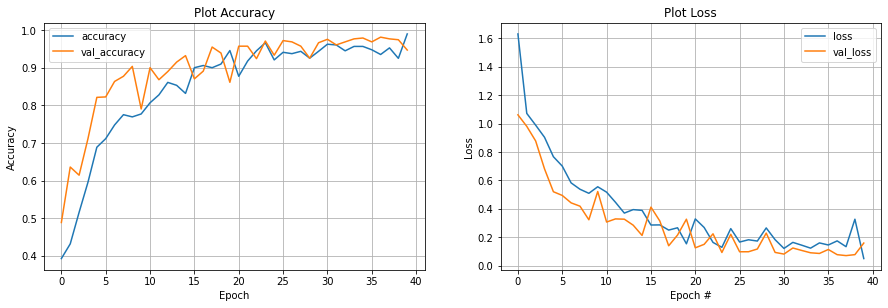

time: 28.3 s (started: 2021-07-24 12:01:11 +00:00)


In [12]:
# display plot model

fig = plt.figure(figsize=(7, 4))
fig.set_figheight(10)
fig.set_figwidth(15)

acc = h.history['accuracy']
loss = h.history['loss']

val_acc = h.history['val_accuracy']
val_loss = h.history['val_loss']

plt.subplot(2, 2, 1)
plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.title('Plot Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title('Plot Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [13]:
score = model.evaluate(train_data)
print('Train Loss:', score[0])
print('Train Accuracy:', score[1])

score = model.evaluate(val_data)
print('Val Loss:', score[0])
print('Val Accuracy:', score[1])

42/42 [==============================] - 7s 170ms/step - loss: 0.1961 - accuracy: 0.9444
Train Loss: 0.1960621029138565
Train Accuracy: 0.9444444179534912
28/28 [==============================] - 5s 165ms/step - loss: 0.1620 - accuracy: 0.9497
Val Loss: 0.16203102469444275
Val Accuracy: 0.9496567249298096
time: 12.7 s (started: 2021-07-24 12:02:00 +00:00)


## Predict

Saving IMG_20210702_134153-01.jpeg to IMG_20210702_134153-01.jpeg
IMG_20210702_134153-01.jpeg
The result of image prediction is
paper


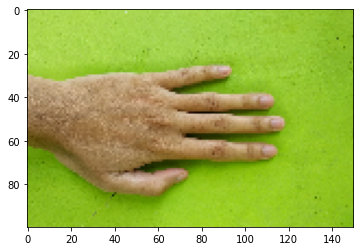

time: 27 s (started: 2021-07-24 12:03:28 +00:00)


In [15]:
# Melakukan prediksi Gambar menggunakan model

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  prob = model.predict(images)
  classes = prob.argmax(axis=-1) 
  
  print(fn)
  print('The result of image prediction is')
  if classes==0:
    print('paper')
  elif classes==1:
    print('rock')
  elif classes==2 :
    print('scissors')